# Formattazione dei grafici con Matplotlib

## Subplots

* `subplots()`: Crea più grafici all'interno di una singola figura.  
* Restituisce due oggetti:  
    1. `fig` - rappresenta l'intera finestra della figura che conterrà tutti i sottografi.  
    2. `ax` - può essere un singolo oggetto asse (per un solo grafico) o un array di assi (per più grafici).  
* Argomenti:
    * `nrows` e `ncols` determinano rispettivamente il numero di righe e colonne di sottografi.
    * `sharex` e `sharey` controllano se gli assi x o y devono essere condivisi tra i sottografi.
* Sintassi: `fig, ax = plt.subplots(nrows, ncols)`
* Esempio: `fig, ax = plt.subplots(1,2)` - Crea una figura con 1 riga e 2 colonne di grafici.


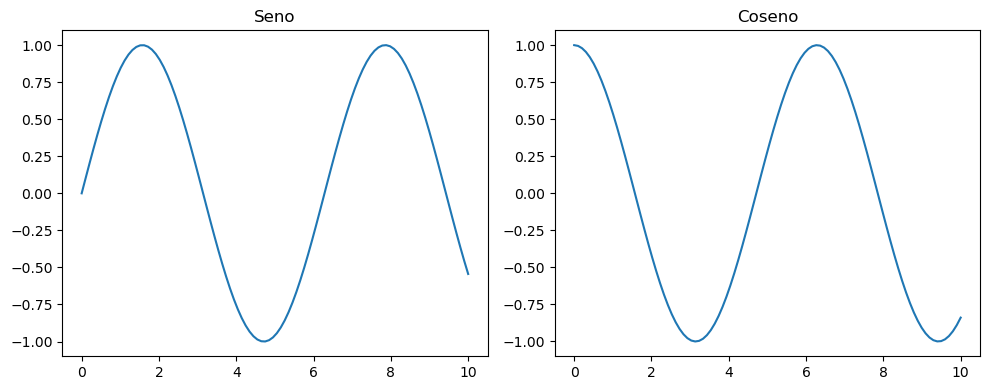

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Crea 2 sottotrame (1 riga, 2 colonne)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Primo subplot
ax[0].plot(x, y1)
ax[0].set_title("Seno")

# Secondo subplot
ax[1].plot(x, y2)
ax[1].set_title("Coseno")

plt.tight_layout()
plt.show()

In [2]:
# Esempio di dataset semplificato
data = {
    'job_title': [
        'Data Scientist', 'Data Scientist', 'Data Engineer', 'Data Engineer',
        'Data Analyst', 'Data Analyst', 'Data Scientist', 'Data Analyst'
    ],
    'job_skills': [
        ['python', 'sql', 'r'],
        ['sas', 'tableau'],
        ['python', 'sql', 'spark'],
        ['aws', 'azure'],
        ['excel', 'sql'],
        ['tableau', 'power bi'],
        ['python', 'sql'],
        ['sql', 'python']
    ]
}

df = pd.DataFrame(data)
df

,job_title,job_skills
0,Data Scientist,"[python, sql, r]"
1,Data Scientist,"[sas, tableau]"
2,Data Engineer,"[python, sql, spark]"
3,Data Engineer,"[aws, azure]"
4,Data Analyst,"[excel, sql]"
5,Data Analyst,"[tableau, power bi]"
6,Data Scientist,"[python, sql]"
7,Data Analyst,"[sql, python]"


## Explode function

In [3]:
# Esplodere le skill per riga
df_exploded = df.explode('job_skills')

# Raggruppare per job title e contare le skill
grouped = df_exploded.groupby(['job_title', 'job_skills']).size().reset_index(name='count')

grouped

,job_title,job_skills,count
0,Data Analyst,excel,1
1,Data Analyst,power bi,1
2,Data Analyst,python,1
3,Data Analyst,sql,2
4,Data Analyst,tableau,1
5,Data Engineer,aws,1
6,Data Engineer,azure,1
7,Data Engineer,python,1
8,Data Engineer,spark,1
9,Data Engineer,sql,1


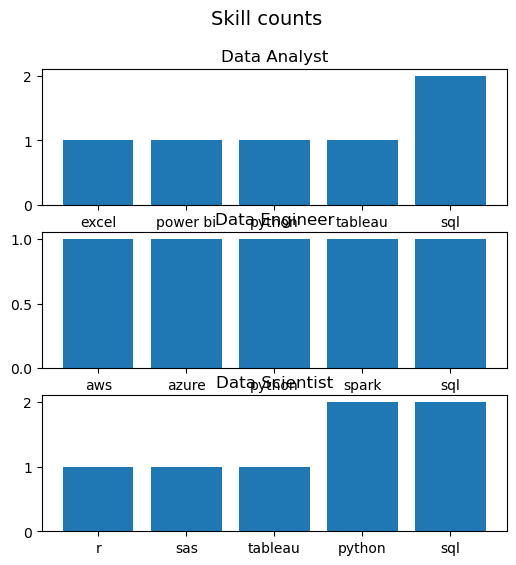

In [4]:
roles = grouped['job_title'].unique()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))  # volutamente stretto

fig.suptitle('Skill counts', fontsize=14)

for ax, role in zip(axes, roles):
    subset = grouped[grouped['job_title'] == role].sort_values(by='count', ascending=True)
    ax.bar(subset['job_skills'], subset['count'])
    ax.set_title(role)

plt.show()


## Tight Layout

* `tight_layout()`: regola automaticamente la spaziatura tra i sottografi e i margini della figura per evitare la sovrapposizione di etichette degli assi, titoli e tick.

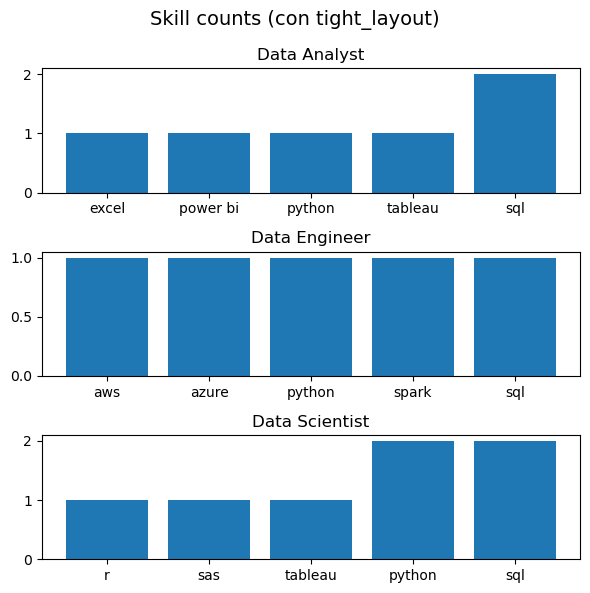

In [5]:
# Stesso codice, ma con tight_layout()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))

fig.suptitle('Skill counts (con tight_layout)', fontsize=14)

for ax, role in zip(axes, roles):
    subset = grouped[grouped['job_title'] == role].sort_values(by='count', ascending=True)
    ax.bar(subset['job_skills'], subset['count'])
    ax.set_title(role)

plt.tight_layout()
plt.show()

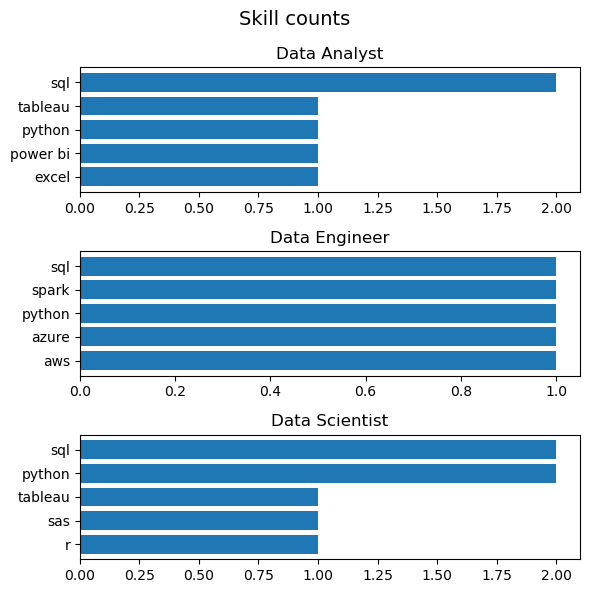

In [6]:
roles = grouped['job_title'].unique()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))  

fig.suptitle('Skill counts', fontsize=14)

for ax, role in zip(axes, roles):
    subset = grouped[grouped['job_title'] == role].sort_values(by='count', ascending=True)
    ax.barh(subset['job_skills'], subset['count'])  # grafico orizzontale
    ax.set_title(role)


plt.tight_layout()
plt.show()


## Savefig

- `savefig()`: salva la figura corrente.

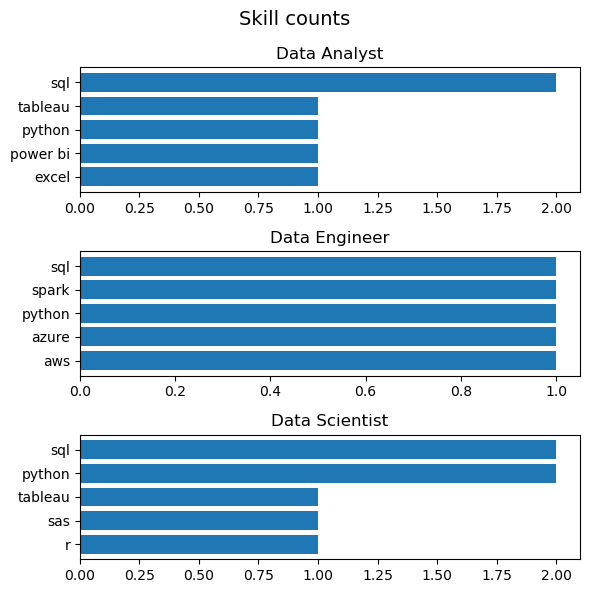

In [7]:
# Save the figure in the file path of your choice 
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))  

fig.suptitle('Skill counts', fontsize=14)

for ax, role in zip(axes, roles):
    subset = grouped[grouped['job_title'] == role].sort_values(by='count', ascending=True)
    ax.barh(subset['job_skills'], subset['count'])  # grafico orizzontale
    ax.set_title(role)


plt.tight_layout()
plt.savefig('top_skills.png')

plt.show()

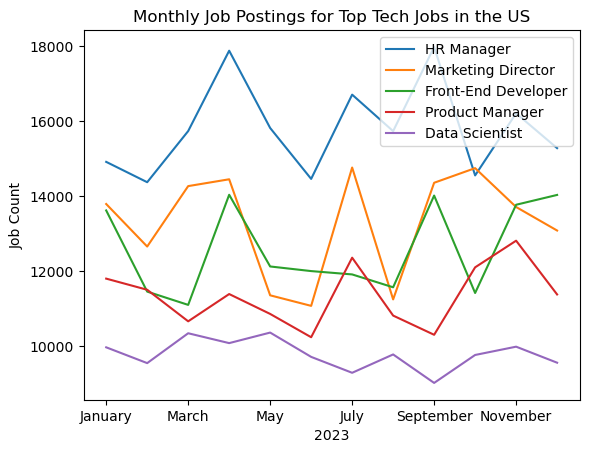

In [8]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

# Set seed for reproducibility
random.seed(12)

# Define job titles
job_titles =  ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Data Scientist': (9000, 11000),
    'Software Engineer': (8000, 10000),
    'Product Manager': (10000, 13000),
    'Marketing Director': (11000, 15000),
    'HR Manager':(14000, 18000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_data_pivot = pd.DataFrame(data, index=months)
df_US_data_pivot.index.name = "job_posted_month"
df_US_merged = df_US_data_pivot.merge(df_US_software_pivot, on='job_posted_month')
top_5 = df_US_merged.sum().sort_values(ascending=False).head(5).index

top_5 = top_5.tolist()
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

## "Customization"

### Stili di Linea e Colori

#### Stile della Linea
* `linestyle`: Cambia lo stile della linea

#### Colore della Linea
* `color`: Cambia il colore della linea
* `colormap`: Cambia la mappa di colori per tutti i punti dati

#### Spessore della Linea
* `linewidth`: Cambia lo spessore della linea

### Marker (Indicatori)

#### Stile del Marker
* `marker`: Cambia lo stile del marker

#### Dimensione del Marker
* `markersize`: Cambia la dimensione del marker

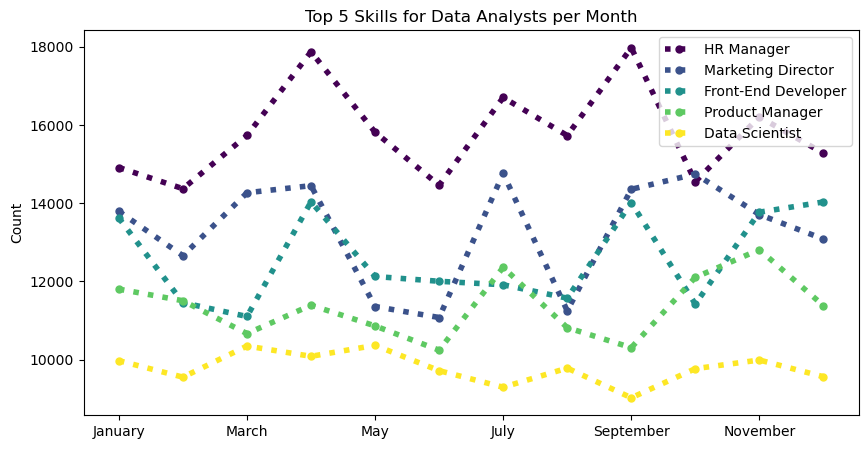

In [9]:
df_US_merged[top_5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=5,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    figsize=(10, 5)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

### Set Axis Limits

#### Set X Limit
* `xlim`: Set the x-axis view limits

#### Set Y Limit
* `ylim`: Set the y-axis view limits

### Grid

#### Add Grid
* `grid`: Add a grid to the plot

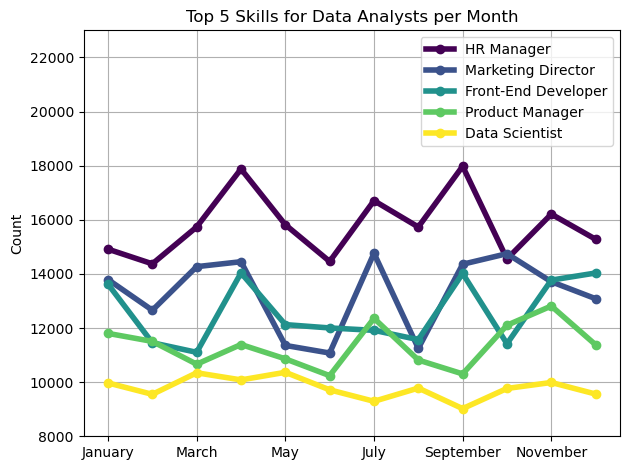

In [10]:
df_US_merged[top_5].plot(kind='line',
    linewidth=4,
    linestyle='-', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=6,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    # figsize=(10, 5)
)

plt.grid(True)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(8000, 23000)
plt.ylabel('Count')
plt.xlabel('')
plt.tight_layout()
plt.show()

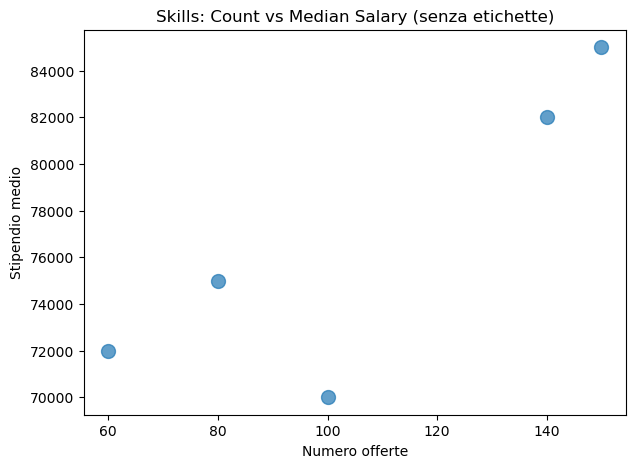

In [11]:
# Dati di esempio: skill, numero offerte, stipendio medio
data = {
    'skill': ['python', 'sql', 'excel', 'tableau', 'power bi'],
    'count': [150, 140, 100, 80, 60],
    'salary_year_avg': [85000, 82000, 70000, 75000, 72000]
}

df = pd.DataFrame(data)

# Scatter plot base
plt.figure(figsize=(7, 5))
plt.scatter(df['count'], df['salary_year_avg'], s=100, alpha=0.7)
plt.title("Skills: Count vs Median Salary (senza etichette)")
plt.xlabel("Numero offerte")
plt.ylabel("Stipendio medio")
plt.show()


### Aggiungere Annotazioni

#### Testo
* `text`: Aggiunge annotazioni testuali al grafico.

#### Argomenti comuni
* `x`: Coordinata x del testo  
* `y`: Coordinata y del testo  
* `s`: Testo da visualizzare  
* `fontsize`: Dimensione del font  
* `color`: Colore del testo  
* `ha`: Allineamento orizzontale (`'left'`, `'center'`, `'right'`)  
* `va`: Allineamento verticale (`'top'`, `'center'`, `'bottom'`)


### Esempio

Ora, guardando il grafico qui sopra, non è molto utile perché in realtà non mostra le etichette delle competenze principali. Cambiamo questo aspetto aggiungendo delle annotazioni. Usiamo un ciclo `for` per scorrere gli indici di `skills` e aggiungere il nome di ogni competenza.


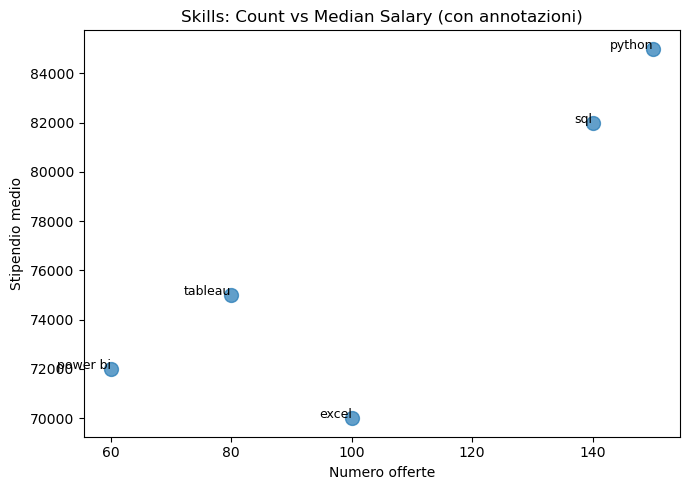

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(df['count'], df['salary_year_avg'], s=100, alpha=0.7)

# Aggiunta etichette testuali
for i in range(len(df)):
    plt.text(
        df['count'][i],
        df['salary_year_avg'][i],
        df['skill'][i],
        fontsize=9,
        ha='right'
    )

plt.title("Skills: Count vs Median Salary (con annotazioni)")
plt.xlabel("Numero offerte")
plt.ylabel("Stipendio medio")
plt.tight_layout()
plt.show()


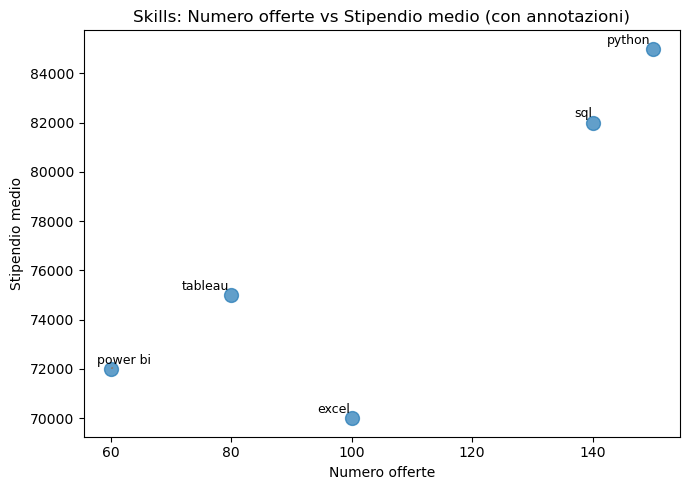

In [13]:
from adjustText import adjust_text
plt.figure(figsize=(7, 5))
plt.scatter(df['count'], df['salary_year_avg'], s=100, alpha=0.7)

# Preparazione delle annotazioni
texts = []
for i in range(len(df)):
    texts.append(
        plt.text(
            df['count'][i],
            df['salary_year_avg'][i],
            df['skill'][i],
            fontsize=9,
            ha='right'
        )
    )

# Sistemazione delle etichette per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Titolo e assi
plt.title("Skills: Numero offerte vs Stipendio medio (con annotazioni)")
plt.xlabel("Numero offerte")
plt.ylabel("Stipendio medio")
plt.tight_layout()
plt.show()